In [1]:
library('ggplot2');

y <- c(12.28, 14.23, 12.62, 14.93, 12.64, 11.18, 14.70, 10.53, 13.90, 10.15, 12.33, 12.07, 11.94, 14.05, 11.24, 11.37, 13.86,
       12.14, 13.56, 9.73, 12.07, 11.82, 17.26, 15.11, 9.22, 13.24, 11.83, 12.31, 10.64, 13.62, 11.15, 11.62, 14.93, 12.58,
       10.34, 9.75, 12.21, 12.01, 9.63, 13.67, 11.70, 13.19, 13.44, 14.15, 11.28, 10.85, 11.54, 10.59, 12.14, 13.36);

x <- c(5, 2, 1, 1, 4, 5, 1, 5, 0, 0, 1, 1, 3, 1, 6, 1, 6,
       2, 5, 5, 5, 0, 0, 2, 6, 2, 2, 0, 0, 6, 6, 0, 4, 3,
       0, 5, 2, 4, 3, 3, 2, 3, 2, 6, 1, 2, 4, 5, 2, 4);
n <- length(x);

al <- 0.10;
h <- 1.20;

mean <- sum(y)/n;
var <- sum((y - mean)^2)/n;

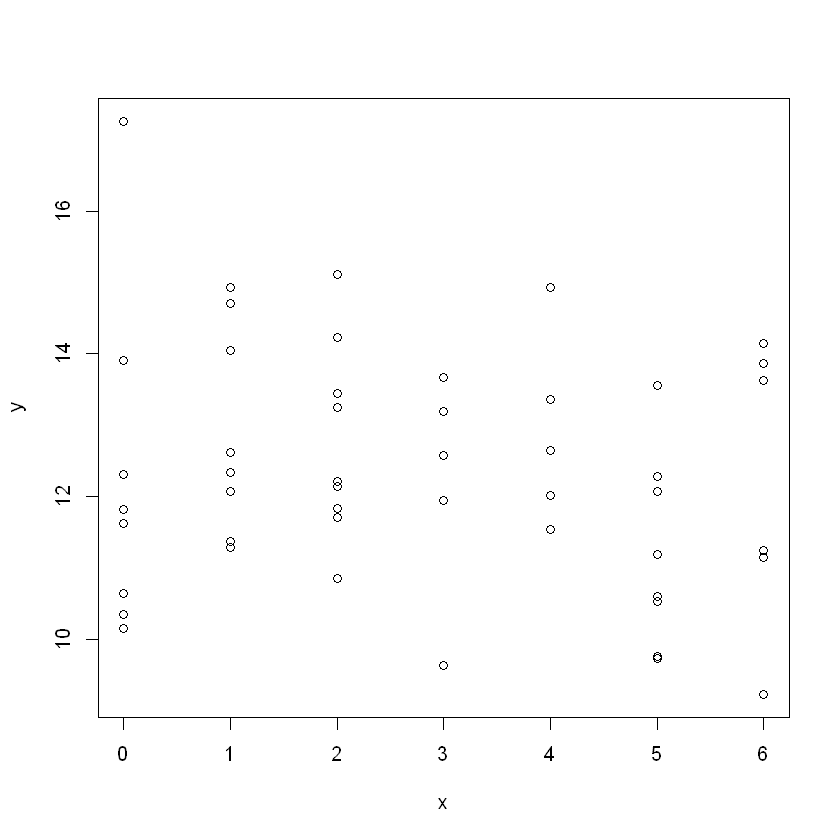

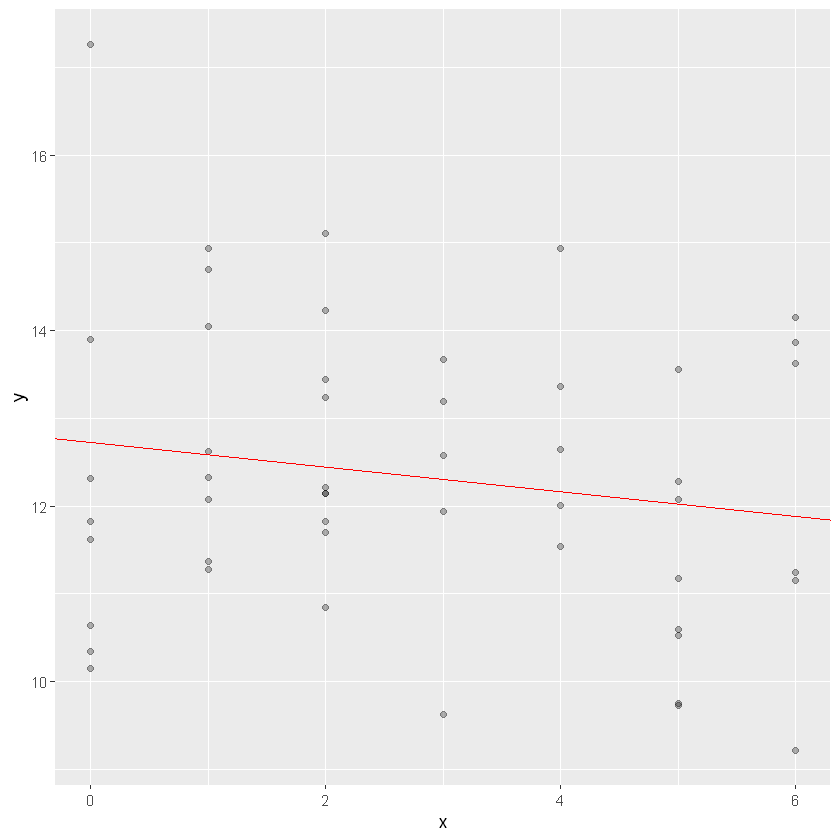

In [2]:
X <- t(matrix(c(array(1, dim=50), x), 50, 2));

plot(x, y);

hat_beta <- solve(X %*% t(X)) %*% X %*% y;

ggplot(data = data.frame(y),aes(x = x, y = y)) +
  geom_point(alpha = 0.3)+
  geom_abline(slope = hat_beta[2], intercept = hat_beta[1], col='red')

[1] 2.70378

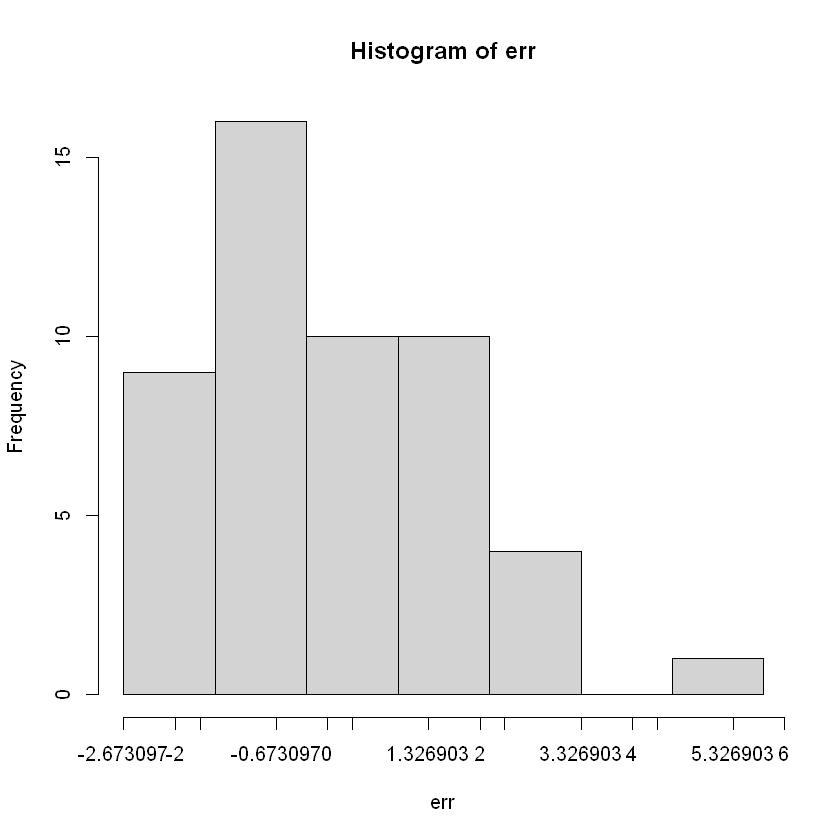

In [3]:
err = y - t(X)%*%hat_beta;
s <- ( sum(err^2) )/(n-2);

his <- hist(err, breaks = seq(min(err), max(err) + h, by=h));
axis(1, at= min(err - 1): max(err) + 1);

s;

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


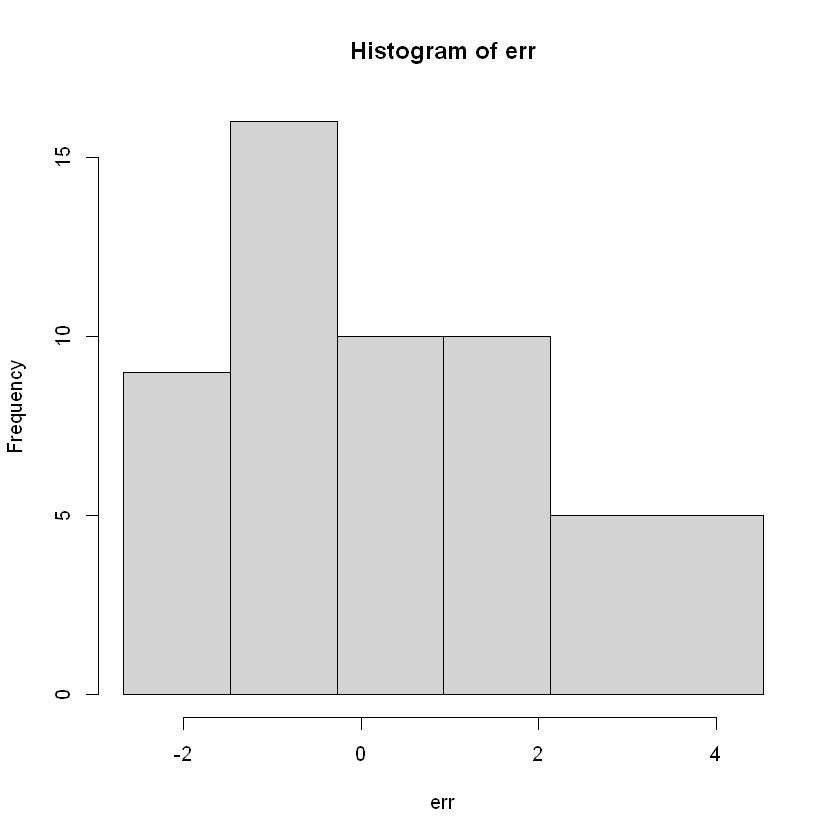

In [4]:
b <- c(-1.47309704807977, -0.273097048079772, 0.926902951920228, 2.12690295192023);
his <- hist(err,breaks=c(min(err), b, max(err)), freq=TRUE);

[1] 2.190002

[1] 7.77944

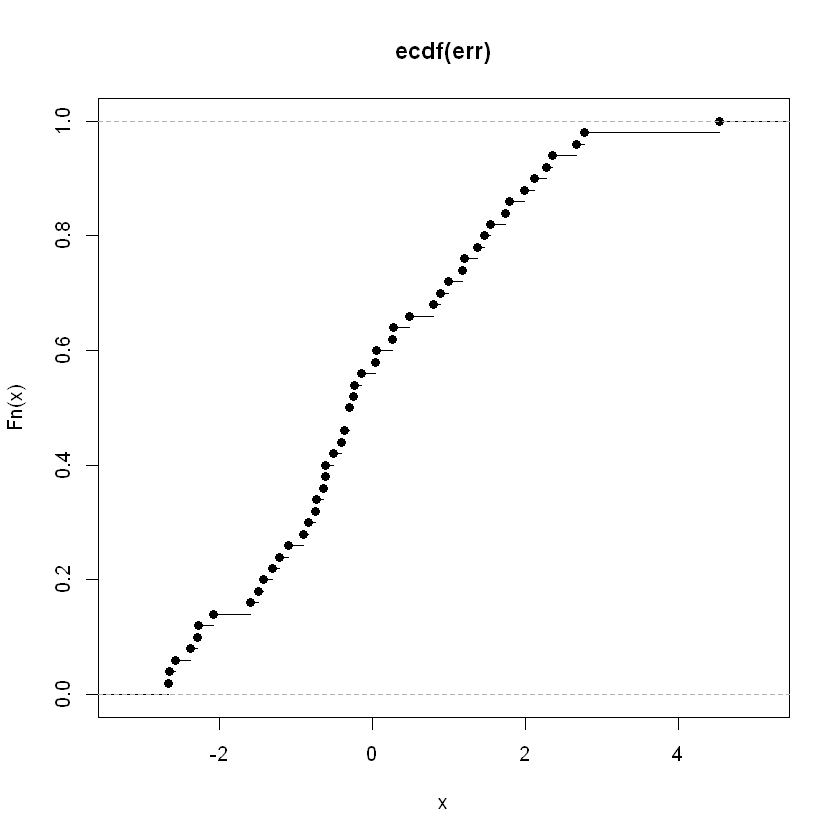

In [5]:
his <- hist(err,breaks=c(min(err), b, max(err)), plot=FALSE);
nu <- his$counts;

X2 <- function(sig){
	g <-n*(pnorm(c(b, Inf), 0, sig) - pnorm(c(-Inf, b), 0, sig));
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=sqrt(s));

xm$min;

x_al <- qchisq(1-al, length(b));
x_al

plot(ecdf(err))

[1] 0.09044857

[1] 1.997828

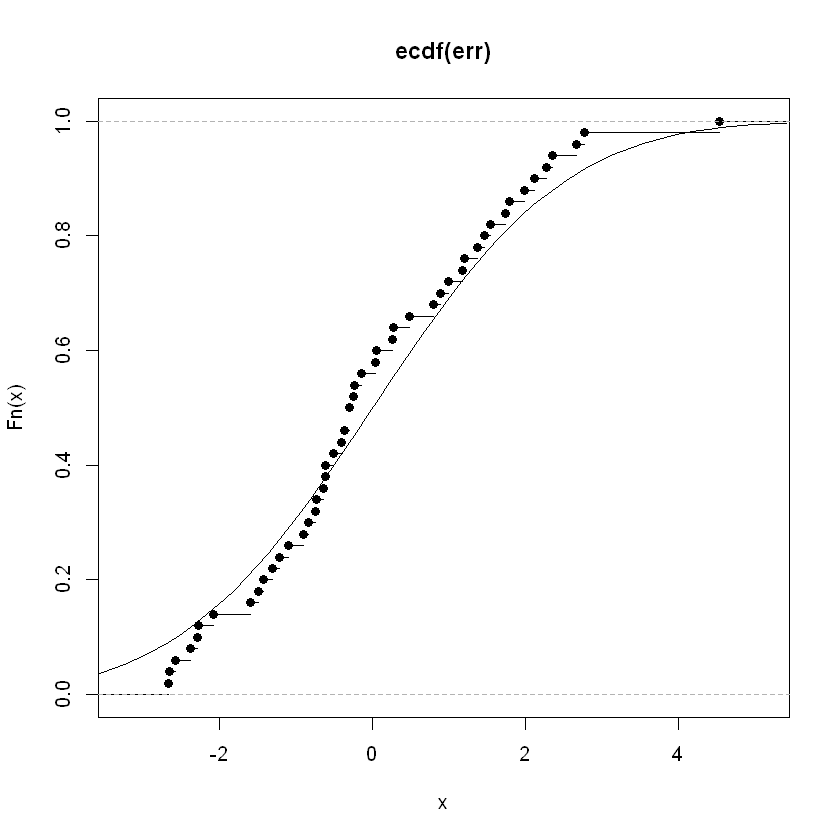

In [6]:
dist <-function(sig){
    f<-pnorm(sort(err),0,sig)
    max(abs(c(0:(n-1))/n-f),abs(c(1:n)/n-f))
}

minimized <- nlm(dist, p=sqrt(s));
min_dist <- minimized$min;
min_dist
param <- minimized$estimate;
param;

plot(ecdf(err))
points(seq(min(err) - 1, max(err) + 1, (max(err) - min(err))/n), pnorm(seq(min(err) - 1, max(err) + 1, (max(err) - min(err))/n), 0, param), "l");

In [7]:
x_al <- qt(1-al, n-1);
C <- c(1, 0);
hat_psy <- t(C)%*%hat_beta;
a <- t(C)%*%solve(X%*%t(X))%*%C;

cat("Доверительный интервал для beta_0: [", hat_psy - x_al*sqrt(a)*var, ",", hat_psy + x_al*sqrt(a)*var, "]\n");

C <- c(0, 1);
hat_psy <- t(C)%*%hat_beta;
a <- t(C)%*%solve(X%*%t(X))%*%C;

cat("Доверительный интервал для beta_1: [", hat_psy - x_al*sqrt(a)*var, ",", hat_psy + x_al*sqrt(a)*var, "]\n");

Доверительный интервал для beta_0: [ 11.88635 , 13.56265 ]
Доверительный интервал для beta_1: [ -0.3846707 , 0.1037348 ]


In [8]:
C <- t(matrix(c(c(1,0), c(0,1)), 2, 2));
hat_psy <- C%*%hat_beta;

e <- eigen(X%*%t(X));

P <- t(e$vectors);
lam <- C * e$values;

#X%*%t(X)
#e
#t(P)%*%lam%*%P;

x_al <- qf(1-al, 2, n-2);
x_al;

2*var

[1] 2.41666

[1] 5.351144

Доверительный эллипс для параметров $(\beta_0, \beta_1)$:

$\Large P(\frac{51.1777 \beta_0^2 + 282.368 \beta_0 \beta_1 - 1246.27 \beta_0 + 586.864 \beta_1^2 - 3358.32 \beta_1 + 7595.36}{5.351144} \le 2.4167) = 0.9$

In [9]:
C <- c(0, 1);
hat_psy <- t(C)%*%hat_beta;

F <- (t(hat_psy)%*% solve(t(C)%*% solve(X%*%t(X)) %*%C) %*%hat_psy)/var;
cat(F[1, 1], "\n");
x_al <- qf(1 - al, 2, n-2);
x_al

1.493945 


[1] 2.41666

12.51247666
0.12658039
-0.04502293


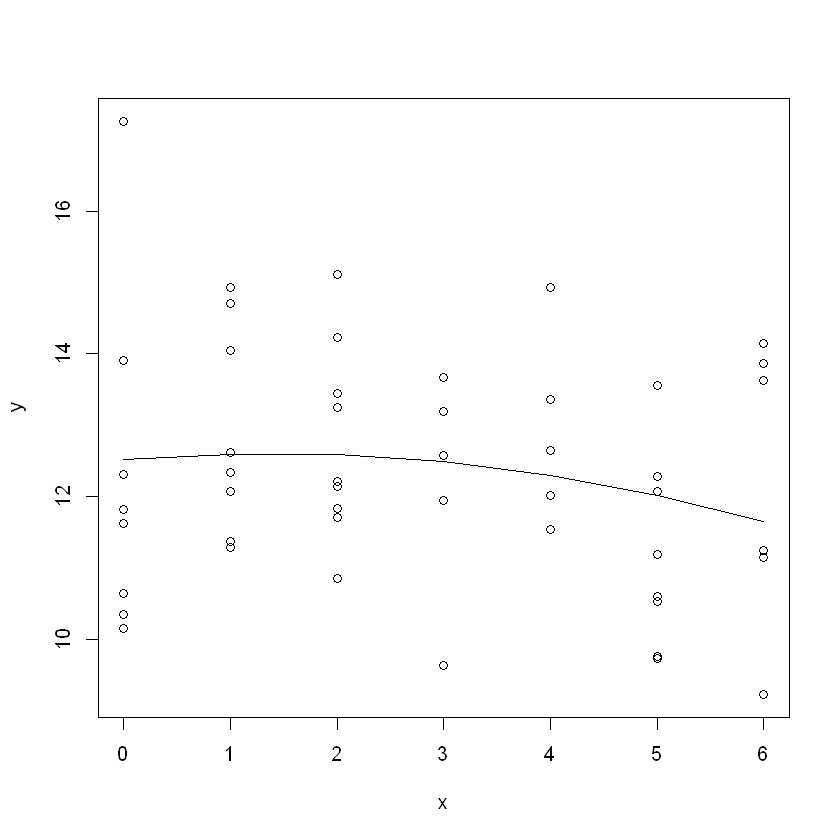

In [10]:
X <- t(matrix(c(array(1, dim=50), x, x^2), 50, 3));

plot(x, y);

hat_beta <- solve(X %*% t(X)) %*% X %*% y;
hat_beta

new_x <- sort(unique(x))
plot(x, y);
points(new_x, hat_beta[1] + hat_beta[2]*new_x + hat_beta[3]*new_x^2, "l");

[1] 2.679981

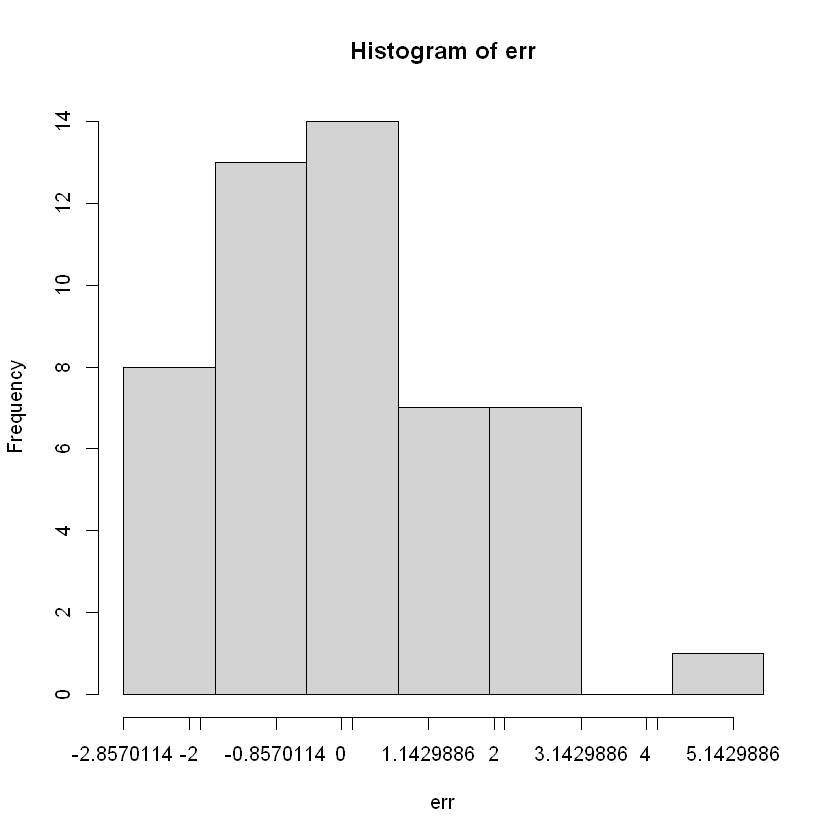

In [11]:
err = y - t(X)%*%hat_beta;
s <- ( sum(err^2) )/(n-2);

his <- hist(err, breaks = seq(min(err), max(err) + h, by=h));
axis(1, at= min(err - 1): max(err) + 1);

s

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


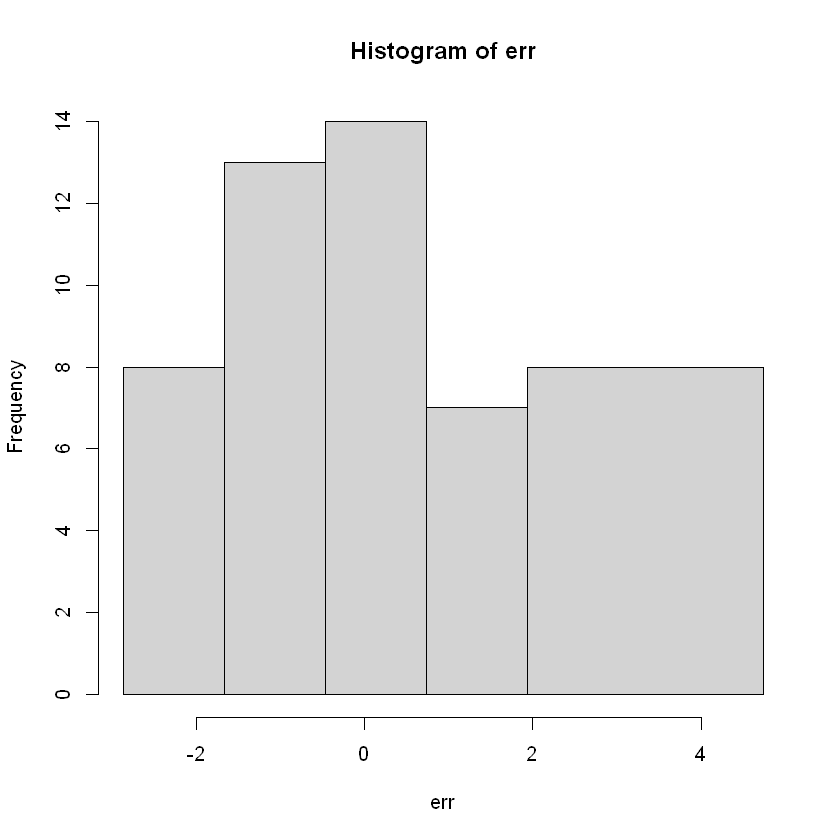

In [12]:
b <- c(-1.657011, -0.4570114, 0.7429886, 1.942989);
his <- hist(err,breaks=c(min(err), b, max(err)), freq=TRUE);

[1] 1.539255

[1] 7.77944

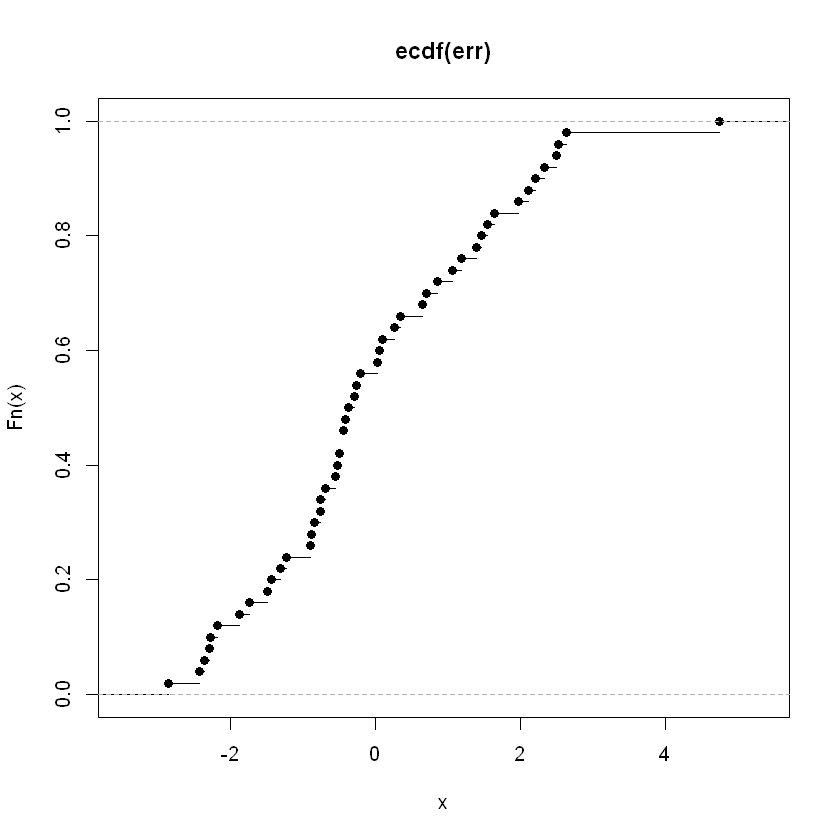

In [13]:
his <- hist(err,breaks=c(min(err), b, max(err)), plot=FALSE);
nu <- his$counts;

X2 <- function(sig){
	g <-n*(pnorm(c(b, Inf), 0, sig) - pnorm(c(-Inf, b), 0, sig));
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=sqrt(s));

xm$min;

x_al <- qchisq(1-al, length(b));
x_al

plot(ecdf(err))

[1] 0.1010987

[1] 1.961943

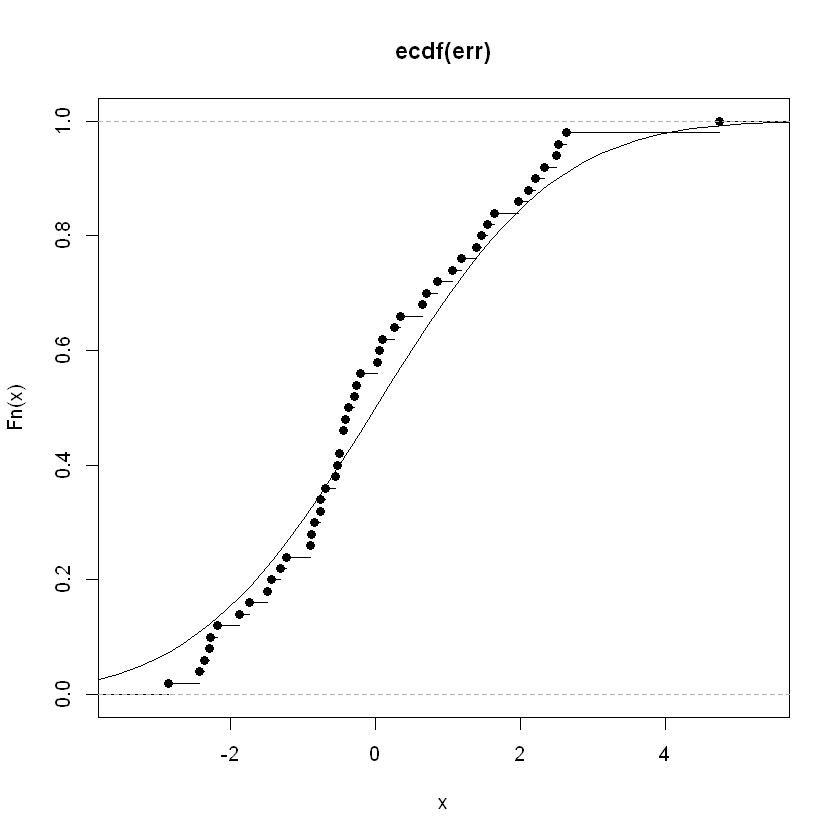

In [14]:
minimized <- nlm(dist, p=sqrt(s));
min_dist <- minimized$min;
min_dist
param <- minimized$estimate;
param;

plot(ecdf(err))
points(seq(min(err) - 1, max(err) + 1, (max(err) - min(err))/n), pnorm(seq(min(err) - 1, max(err) + 1, (max(err) - min(err))/n), 0, param), "l");

In [15]:
x_al <- qt(1-al, n-1);
C <- c(1, 0, 0);
hat_psy <- t(C)%*%hat_beta;
a <- t(C)%*%solve(X%*%t(X))%*%C;

cat("Доверительный интервал для beta_0: [", hat_psy - x_al*sqrt(a)*var, ",", hat_psy + x_al*sqrt(a)*var, "]\n");

C <- c(0, 1, 0);
hat_psy <- t(C)%*%hat_beta;
a <- t(C)%*%solve(X%*%t(X))%*%C;

cat("Доверительный интервал для beta_1: [", hat_psy - x_al*sqrt(a)*var, ",", hat_psy + x_al*sqrt(a)*var, "]\n");

C <- c(0, 0, 1);
hat_psy <- t(C)%*%hat_beta;
a <- t(C)%*%solve(X%*%t(X))%*%C;

cat("Доверительный интервал для beta_2: [", hat_psy - x_al*sqrt(a)*var, ",", hat_psy + x_al*sqrt(a)*var, "]\n");

Доверительный интервал для beta_0: [ 11.42716 , 13.59779 ]
Доверительный интервал для beta_1: [ -0.7755416 , 1.028702 ]
Доверительный интервал для beta_2: [ -0.1914374 , 0.1013915 ]


In [16]:
C <- t(matrix(c(c(1,0,0), c(0,1,0), c(0,0,1)), 3, 3));
hat_psy <- C%*%hat_beta;

e <- eigen(X%*%t(X));

P <- t(e$vectors);
lam <- C * e$values;

#X%*%t(X)
#e
#t(P)%*%lam%*%P;

x_al <- qf(1-al, 3, n-3);
x_al;
3*s

[1] 2.204182

[1] 8.039944

$\Large P(\frac{49.8728*\beta_0^2 + 583.735*\beta_1^2 + 14605*\beta_2^2 + 277.2*\beta_0 \beta_1 + 1181.29*\beta_0 \beta_2 + 5647.35*\beta_1 \beta_2 - 1220.66*\beta_0 - 3305.81*\beta_1 - 13868.9*\beta_2 + 7480.81}{8.04} \le 2.2042) = 0.9$

In [17]:
C <- c(0, 0, 1);
hat_psy <- t(C)%*%hat_beta;

F <- (t(hat_psy)%*% solve(t(C)%*% solve(X%*%t(X)) %*%C) %*%hat_psy)/var;
cat(F[1, 1], "\n");
x_al <- qf(1 - al, 3, n-3);
x_al

0.4269534 


[1] 2.204182